In [40]:
!pip install psycopg2-binary pandas


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# Import the libraries
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
conn = psycopg2.connect(
    host="localhost",
    port="5432",
    database="energy_data",
    user="postgres",
    password="aoufnihed"
)


In [43]:
# Define the SQL query for cross_border_exchanges
query = "SELECT * FROM cross_border_exchanges;"

In [44]:
# Read data into a pandas DataFrame
df_cross_border_exchanges = pd.read_sql_query(query, conn)

C:\Users\hey\AppData\Local\Temp\ipykernel_18504\2650615842.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cross_border_exchanges = pd.read_sql_query(query, conn)


In [45]:
# Close the connection
conn.close()

In [46]:
# Display the first few rows of the DataFrame
df_cross_border_exchanges.head()


,datetime,heures,echcomangleterre,echcommespagne,echcommitalie,echcommsuisse,echcommallemagnebelgique
0,2022-01-01,00:00:00,188.0,-3330.0,-2033.0,-3200.0,5371.0
1,2022-01-01,00:15:00,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,00:30:00,188.0,-3330.0,-2033.0,-3200.0,5284.0
3,2022-01-01,00:45:00,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,01:00:00,177.0,-3330.0,-2033.0,-3200.0,5246.0


In [47]:
df_cross_border_exchanges.tail()

,datetime,heures,echcomangleterre,echcommespagne,echcommitalie,echcommsuisse,echcommallemagnebelgique
35035,2022-12-31,22:45:00,NaN,NaN,NaN,NaN,NaN
35036,2022-12-31,23:00:00,-1430.0,258.0,-2514.0,-2831.0,3919.0
35037,2022-12-31,23:15:00,NaN,NaN,NaN,NaN,NaN
35038,2022-12-31,23:30:00,-1430.0,258.0,-2514.0,-2831.0,3921.0
35039,2022-12-31,23:45:00,NaN,NaN,NaN,NaN,NaN


In [48]:
df_cross_border_exchanges.describe()

,datetime,echcomangleterre,echcommespagne,echcommitalie,echcommsuisse,echcommallemagnebelgique
count,35040,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2022-07-02 00:00:00,1133.985502,1038.348288,-2045.034247,-1378.469349,3133.620320
min,2022-01-01 00:00:00,-3028.000000,-3746.000000,-4317.000000,-3700.000000,-8488.000000
25%,2022-04-02 00:00:00,164.000000,267.000000,-2995.000000,-2534.250000,1457.750000
50%,2022-07-02 00:00:00,1661.500000,1700.000000,-2379.000000,-1650.000000,3305.000000
75%,2022-10-01 00:00:00,2258.000000,2350.000000,-1336.500000,-163.750000,5028.000000
max,2022-12-31 00:00:00,3028.000000,3515.000000,1495.000000,2300.000000,10701.000000
std,NaN,1584.335961,1789.662117,1229.508994,1481.497917,2721.177035


In [49]:
df_cross_border_exchanges.duplicated().sum()

0

In [50]:
# Check for missing values
print(df_cross_border_exchanges.isnull().sum())

datetime                        0
heures                          0
echcomangleterre            17520
echcommespagne              17520
echcommitalie               17520
echcommsuisse               17520
echcommallemagnebelgique    17520
dtype: int64


In [51]:
#Assuming your DataFrame is named df
df_cross_border_exchanges['datetime'] = pd.to_datetime(df_cross_border_exchanges['datetime'])

# Define seasons
def get_season(date):
    year = date.year
    seasons = {
        'spring': pd.date_range(start=f'{year}-03-21', end=f'{year}-06-20'),
        'summer': pd.date_range(start=f'{year}-06-21', end=f'{year}-09-22'),
        'autumn': pd.date_range(start=f'{year}-09-23', end=f'{year}-12-20'),
        'winter': pd.date_range(start=f'{year}-12-21', end=f'{year+1}-03-20')
    }
    for season, date_range in seasons.items():
        if date in date_range:
            return season
    return 'winter'  

df_cross_border_exchanges['season'] =df_cross_border_exchanges['datetime'].apply(get_season)

In [52]:
# Define periods of the day
def get_period_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [53]:
df_cross_border_exchanges['heure'] = pd.to_datetime(df_cross_border_exchanges['heures'], format='%H:%M:%S').dt.hour
df_cross_border_exchanges['period_of_day'] =df_cross_border_exchanges['heure'].apply(get_period_of_day)

# Drop the 'heures' and 'heure' columns as they are no longer needed
df_cross_border_exchanges.drop(columns=['heures', 'heure'], inplace=True)

In [54]:
df_cross_border_exchanges.head()

,datetime,echcomangleterre,echcommespagne,echcommitalie,echcommsuisse,echcommallemagnebelgique,season,period_of_day
0,2022-01-01,188.0,-3330.0,-2033.0,-3200.0,5371.0,winter,night
1,2022-01-01,NaN,NaN,NaN,NaN,NaN,winter,night
2,2022-01-01,188.0,-3330.0,-2033.0,-3200.0,5284.0,winter,night
3,2022-01-01,NaN,NaN,NaN,NaN,NaN,winter,night
4,2022-01-01,177.0,-3330.0,-2033.0,-3200.0,5246.0,winter,night


In [55]:
df_cross_border_exchanges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   datetime                  35040 non-null  datetime64[ns]
 1   echcomangleterre          17520 non-null  float64       
 2   echcommespagne            17520 non-null  float64       
 3   echcommitalie             17520 non-null  float64       
 4   echcommsuisse             17520 non-null  float64       
 5   echcommallemagnebelgique  17520 non-null  float64       
 6   season                    35040 non-null  object        
 7   period_of_day             35040 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 2.1+ MB


In [56]:
sns.set(style="whitegrid")


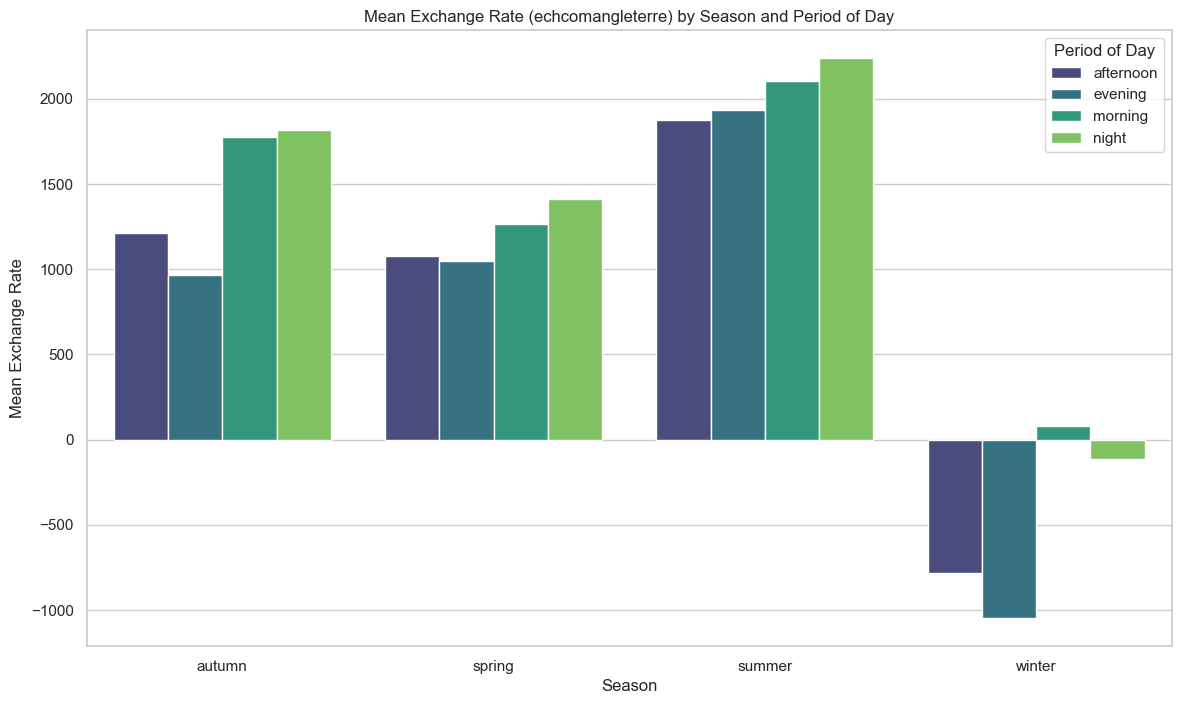

In [57]:


# Aggregate data by season and period of the day
aggregated_df = df_cross_border_exchanges.groupby(['season', 'period_of_day'])['echcomangleterre'].mean().reset_index()

# Plot exchange rate 'echcomangleterre' as a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='echcomangleterre', hue='period_of_day', data=aggregated_df, palette='viridis')

plt.title('Mean Exchange Rate (echcomangleterre) by Season and Period of Day')
plt.xlabel('Season')
plt.ylabel('Mean Exchange Rate')
plt.legend(title='Period of Day', loc='best')
plt.show()

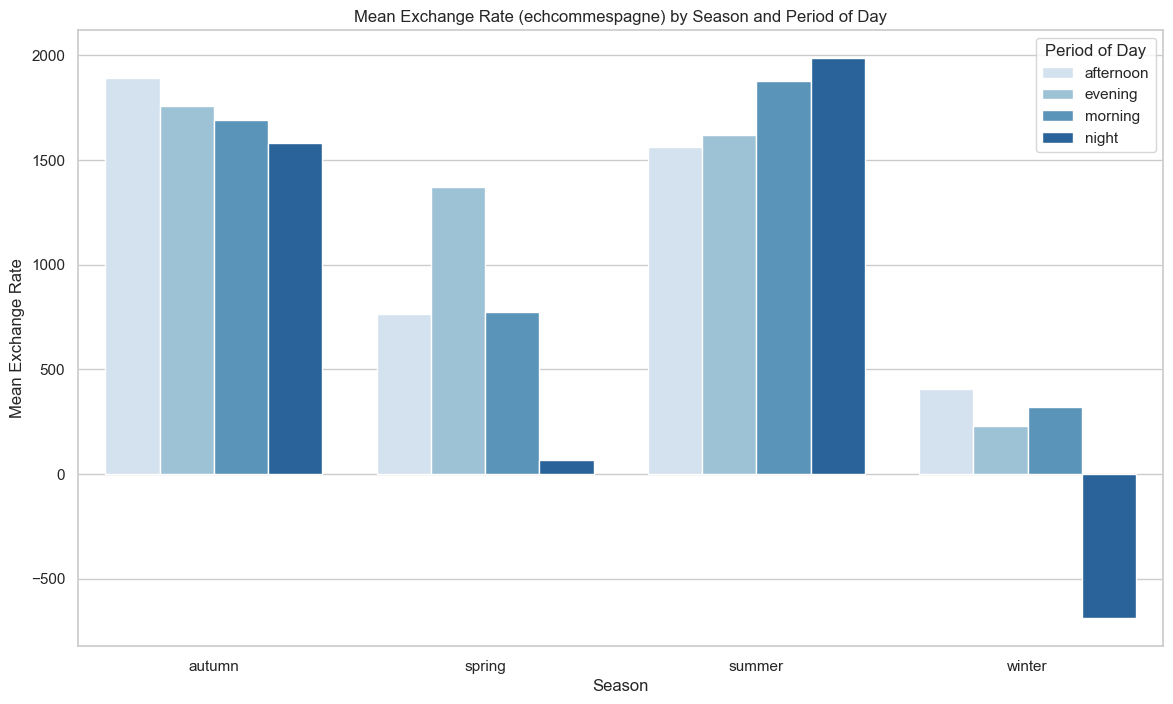

In [62]:
# Set aesthetics for plots
sns.set(style="whitegrid")

# Aggregate data by season and period of the day
aggregated_df = df_cross_border_exchanges.groupby(['season', 'period_of_day'])['echcommespagne'].mean().reset_index()

# Plot exchange rate 'echcommespagne' as a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='echcommespagne', hue='period_of_day', data=aggregated_df, palette='Blues')

plt.title('Mean Exchange Rate (echcommespagne) by Season and Period of Day')
plt.xlabel('Season')
plt.ylabel('Mean Exchange Rate')
plt.legend(title='Period of Day', loc='best')
plt.show()

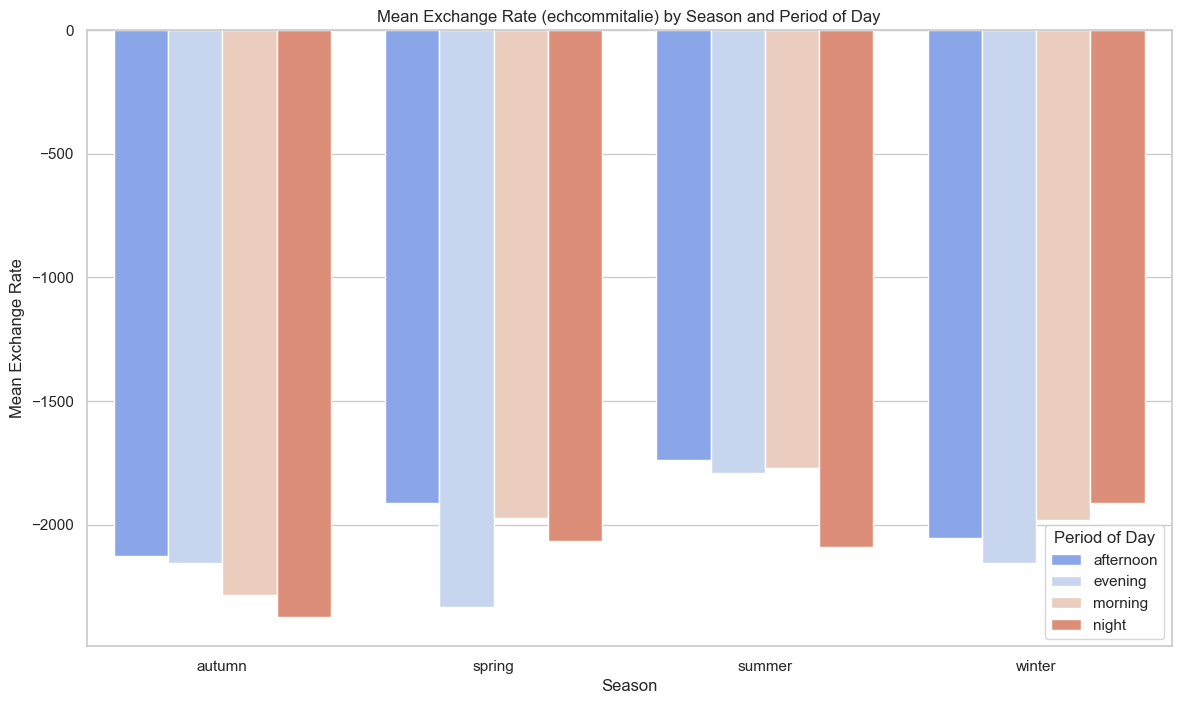

In [64]:
aggregated_df = df_cross_border_exchanges.groupby(['season', 'period_of_day'])['echcommitalie'].mean().reset_index()

# Plot exchange rate 'echcommitalie' as a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='echcommitalie', hue='period_of_day', data=aggregated_df, palette="coolwarm")

plt.title('Mean Exchange Rate (echcommitalie) by Season and Period of Day')
plt.xlabel('Season')
plt.ylabel('Mean Exchange Rate')
plt.legend(title='Period of Day', loc='best')
plt.show()

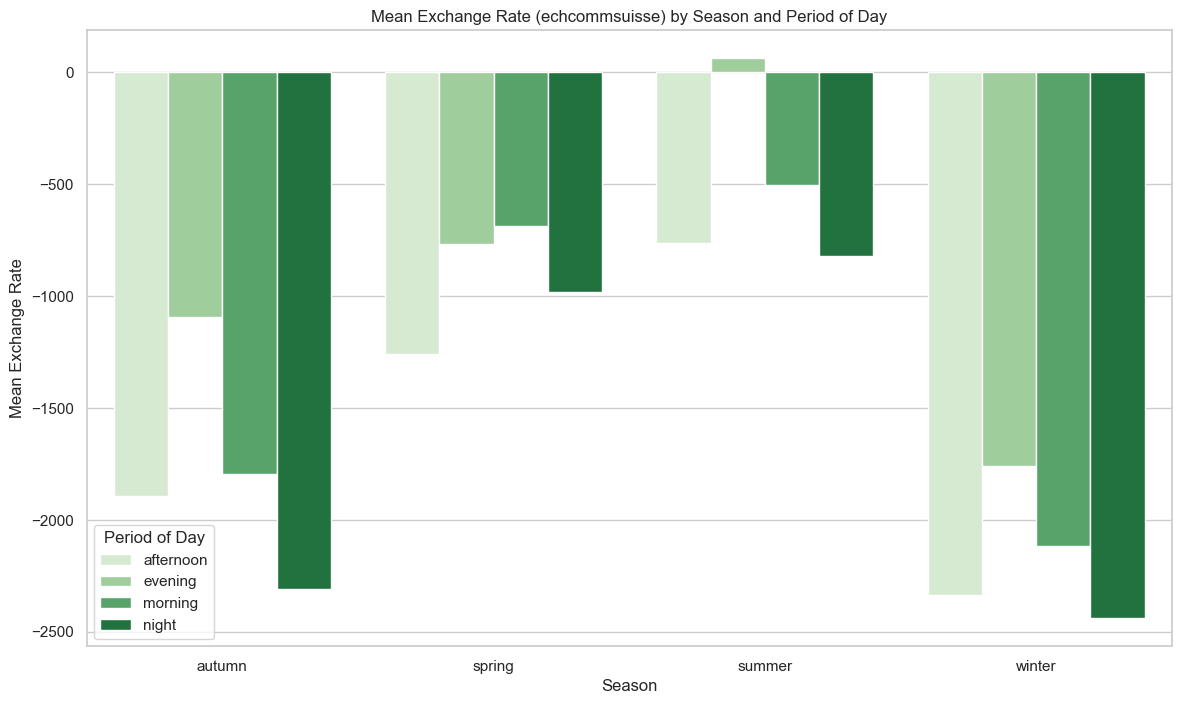

In [65]:
# Aggregate data by season and period of the day
aggregated_df = df_cross_border_exchanges.groupby(['season', 'period_of_day'])['echcommsuisse'].mean().reset_index()

# Plot exchange rate 'echcommsuisse' as a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='echcommsuisse', hue='period_of_day', data=aggregated_df, palette="Greens")

plt.title('Mean Exchange Rate (echcommsuisse) by Season and Period of Day')
plt.xlabel('Season')
plt.ylabel('Mean Exchange Rate')
plt.legend(title='Period of Day', loc='best')
plt.show()

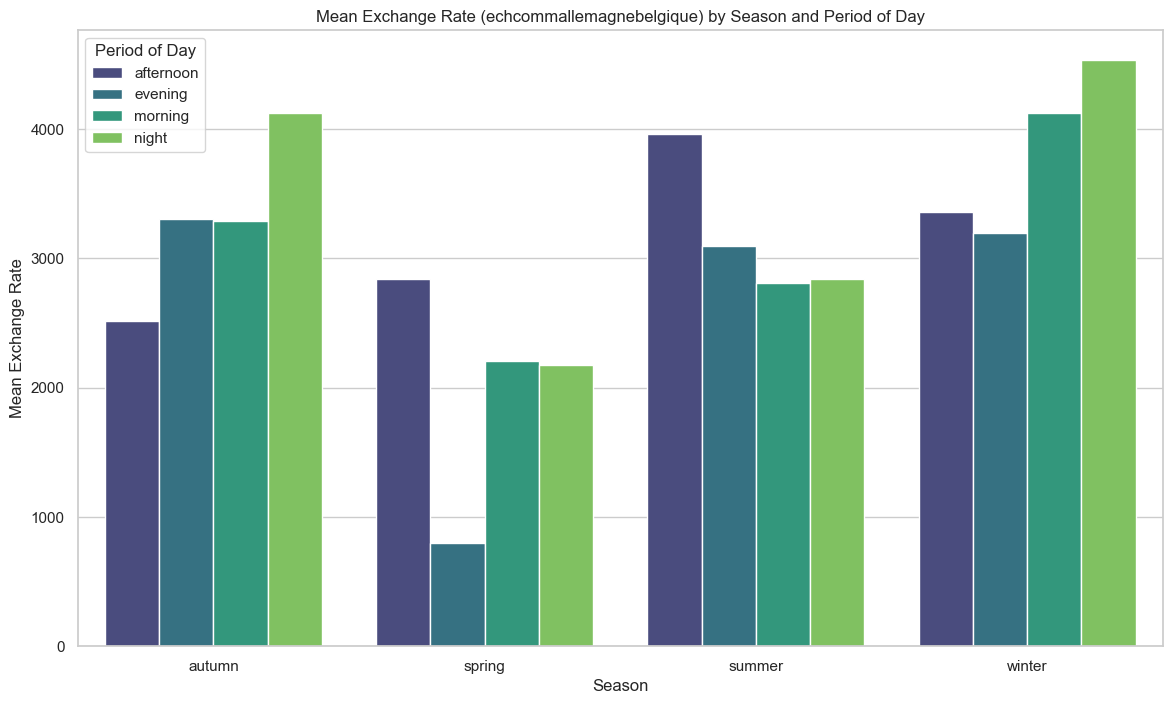

In [66]:
# Aggregate data by season and period of the day
aggregated_df = df_cross_border_exchanges.groupby(['season', 'period_of_day'])['echcommallemagnebelgique'].mean().reset_index()

# Plot exchange rate 'echcommallemagnebelgique' as a bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='echcommallemagnebelgique', hue='period_of_day', data=aggregated_df, palette='viridis')

plt.title('Mean Exchange Rate (echcommallemagnebelgique) by Season and Period of Day')
plt.xlabel('Season')
plt.ylabel('Mean Exchange Rate')
plt.legend(title='Period of Day', loc='best')
plt.show()